## Padding IN CNN

In [1]:
import torch
import torch.nn as nn


In [3]:
# Batch size = 1,channel= 1,height = 5,width = 5 (Dummy Data)

x = torch.randn(1,1,5,5)
print("Input Shape",x.shape)
print(x)

Input Shape torch.Size([1, 1, 5, 5])
tensor([[[[-0.5324, -1.4085,  0.5086,  0.4853, -0.7666],
          [-0.6623, -0.6351, -0.3932,  1.4882,  2.6799],
          [ 0.3240, -0.5212,  1.0787, -1.3287, -0.0903],
          [ 1.0617, -0.2416, -0.1560,  0.6213,  0.9020],
          [ 0.9541, -0.1025,  1.3679,  1.7941,  1.4301]]]])


In [5]:
# Convolution with out padding
conv_valid = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,padding=0)
out_valid = conv_valid(x)
print("Without padding the shape",out_valid.shape)
print(out_valid)

Without padding the shape torch.Size([1, 1, 3, 3])
tensor([[[[ 0.2026,  0.0022, -0.5471],
          [ 0.1428,  0.2493,  0.4910],
          [ 0.6503, -0.0489,  1.1432]]]], grad_fn=<ConvolutionBackward0>)


Because a 3×3 kernel reduces both dimensions by 2 pixels (5 → 3).

In [6]:
# Convolution With Padding
conv_same = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,padding=1)
out_same = conv_same(x)
print("With padding the shape",out_same.shape)
print(out_same)

With padding the shape torch.Size([1, 1, 5, 5])
tensor([[[[ 0.5267,  0.0961, -0.7814, -0.0940,  0.8775],
          [ 0.4108, -0.3197,  0.1213, -0.5432, -0.5821],
          [ 0.1237,  0.1935, -0.2962,  0.8101,  0.6118],
          [ 0.1161,  0.2173,  0.1382, -0.3966,  0.5216],
          [ 0.1908,  0.0256, -0.5904, -0.1050,  0.4137]]]],
       grad_fn=<ConvolutionBackward0>)


Padding=1 keeps the size same as input

In [7]:
# Manual Padding
zero_pad = nn.ZeroPad2d(padding=1)  # pad 1 pixel on all sides
x_padded = zero_pad(x)
print("After manual padding:", x_padded.shape)

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=0)
out = conv(x_padded)
print("Output shape (manual padding):", out.shape)


After manual padding: torch.Size([1, 1, 7, 7])
Output shape (manual padding): torch.Size([1, 1, 5, 5])


## Strides IN CNN

In [8]:
import torch
import torch.nn as nn

# Dummy input: batch=1, channels=1, height=7, width=7
x = torch.randn(1, 1, 7, 7)
print("Input shape:", x.shape)

# Convolution with stride=1
conv_stride1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0)
out_stride1 = conv_stride1(x)
print("Output shape (stride=1):", out_stride1.shape)

# Convolution with stride=2
conv_stride2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=0)
out_stride2 = conv_stride2(x)
print("Output shape (stride=2):", out_stride2.shape)

# Convolution with stride=3
conv_stride3 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=3, padding=0)
out_stride3 = conv_stride3(x)
print("Output shape (stride=3):", out_stride3.shape)


Input shape: torch.Size([1, 1, 7, 7])
Output shape (stride=1): torch.Size([1, 1, 5, 5])
Output shape (stride=2): torch.Size([1, 1, 3, 3])
Output shape (stride=3): torch.Size([1, 1, 2, 2])


Output=((Input−Kernel)+2×Padding)/(Stride)​+1

## Polling Layer IN CNN

In [9]:
import torch
import torch.nn as nn

# Dummy input: (batch_size=1, channels=1, height=4, width=4)
x = torch.tensor([
    [
        [[1.0, 2.0, 3.0, 4.0],
         [5.0, 6.0, 7.0, 8.0],
         [9.0, 10.0, 11.0, 12.0],
         [13.0, 14.0, 15.0, 16.0]]
    ]
])

print("Input:\n", x)
print("Input shape:", x.shape)


Input:
 tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])
Input shape: torch.Size([1, 1, 4, 4])


In [10]:
max_pool = nn.MaxPool2d(kernel_size=2,stride = 2)
out_max = max_pool(x)
print("Max pooling output:\n", out_max)
print("Output shape:", out_max.shape)
# you can add maximum pooling average pooling according to your convience

Max pooling output:
 tensor([[[[ 6.,  8.],
          [14., 16.]]]])
Output shape: torch.Size([1, 1, 2, 2])


In [11]:
# Add to CNN Model

model = nn.Sequential(
    nn.Conv2d(1,8,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,stride=2),
    nn.Conv2d(8,16,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2,stride=2)
)

## Applying CNN IN MNIST Data

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [22]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

In [25]:
# visualize number of digits classes
# plt.figure(figsize=(15,7))
# g = sns.countplot(Y_train, palette="icefire")
# plt.title("Number of digit classes")
Y_train.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


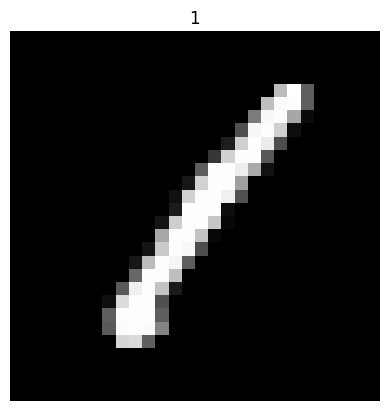

In [27]:
# plot some samples
img = X_train.iloc[0].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [28]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [29]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [31]:
# Label Encoding
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [32]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


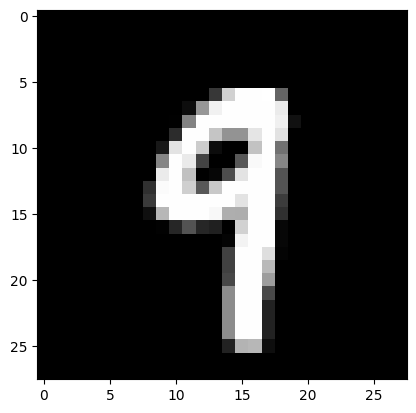

In [33]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [35]:
#
from sklearn.metrics import confusion_matrix
import itertools

# from keras.utils.np_utils import to_categorical # This import is deprecated and already handled by tensorflow.keras.utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [36]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [39]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [44]:
epochs = 5  # for better result increase the epochs
batch_size = 250

In [41]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [45]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 43s 284ms/step - accuracy: 0.7244 - loss: 0.8528 - val_accuracy: 0.9545 - val_loss: 0.1625
Epoch 2/5
  1/151 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.8800 - loss: 0.3842

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8800 - loss: 0.3842 - val_accuracy: 0.9540 - val_loss: 0.1634
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 73s 234ms/step - accuracy: 0.8734 - loss: 0.4055 - val_accuracy: 0.9633 - val_loss: 0.1228
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9040 - loss: 0.2797 - val_accuracy: 0.9652 - val_loss: 0.1198
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 224ms/step - accuracy: 0.9036 - loss: 0.3171 - val_accuracy: 0.9690 - val_loss: 0.1008


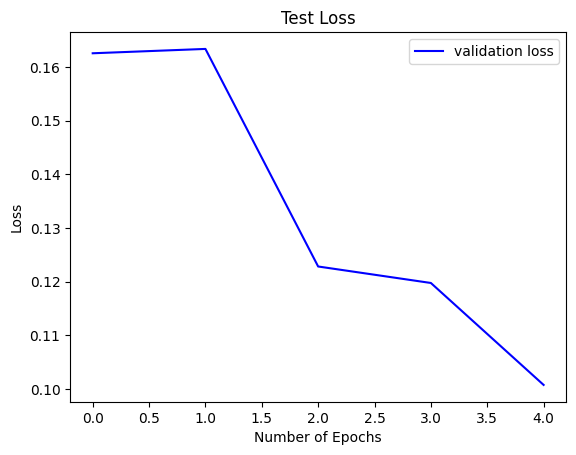

In [46]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


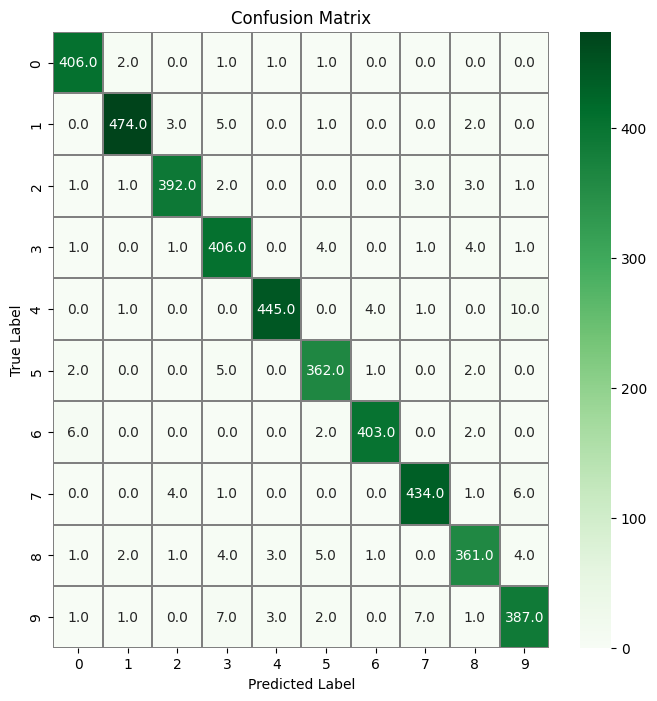

In [47]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()